In [27]:
!pip install visual_aids

ERROR: Could not find a version that satisfies the requirement visual_aids (from versions: none)
ERROR: No matching distribution found for visual_aids


In [21]:
from check_environment import run_checks
run_checks()

ModuleNotFoundError: No module named 'check_environment'

In [25]:
from visual_aids import stats_viz

ModuleNotFoundError: No module named 'visual_aids'

In [10]:
import numpy as np

data = np.loadtxt("data/export.csv",
                     delimiter=';',
                     #names=True,
                     dtype=str,
                     #encoding='UTF'
                 )

print(data)

ValueError: the number of columns changed from 1 to 2 at row 5; use `usecols` to select a subset and avoid this error

In [16]:
# Let's first load and inspect the content of the uploaded CSV file to understand its structure.

import pandas as pd

# Load the CSV file
file_path = 'data/export.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect it
df.head()


,Nume clasa statistica:,serii zilnice
0,Observatii despre clasa statistica:,NaN
1,Nota despre clasa statistica:,serii disponibile începând din iulie 2005
2,Metodologie:,NaN
3,Data;Euro (RON/EUR) CURSZ_EUR,NaN
4,20.01.2025;4,9765


In [18]:
# Skipping first few rows that contain metadata and manually inspecting the data
# We will skip rows that do not appear to be part of the dataset.

# Reload the CSV, skipping the first 4 rows, and re-inspect the data
df_cleaned = pd.read_csv(file_path, skiprows=4, sep=';')

# Display the first few rows to verify the cleaning process
df_cleaned.head()


,Data,Euro (RON/EUR) CURSZ_EUR
0,20.01.2025,"4,9765"
1,17.01.2025,"4,9759"
2,16.01.2025,"4,9749"
3,15.01.2025,"4,9750"
4,14.01.2025,"4,9742"


In [20]:
# Convert the "Euro (RON/EUR)" values to numeric, replacing commas with dots for decimal points
df_cleaned['Euro (RON/EUR) CURSZ_EUR'] = df_cleaned['Euro (RON/EUR) CURSZ_EUR'].str.replace(',', '.').astype(float)

# Display the cleaned dataframe
df_cleaned.head()


,Data,Euro (RON/EUR) CURSZ_EUR
0,20.01.2025,4.9765
1,17.01.2025,4.9759
2,16.01.2025,4.9749
3,15.01.2025,4.9750
4,14.01.2025,4.9742


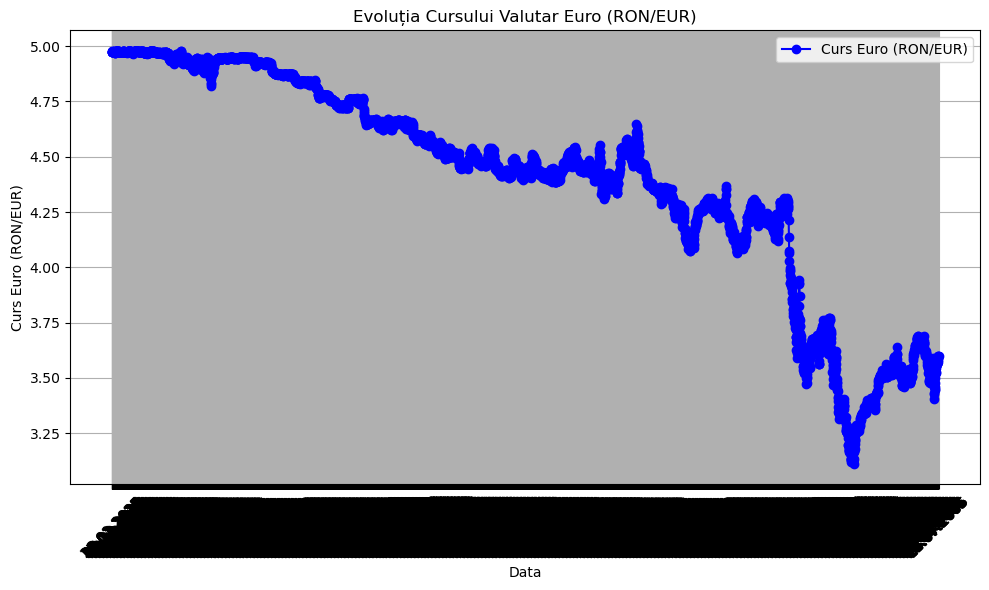

(count    4936.000000
 mean        4.401041
 std         0.481479
 min         3.111200
 25%         4.231925
 50%         4.466950
 75%         4.780200
 max         4.978300
 Name: Euro (RON/EUR) CURSZ_EUR, dtype: float64,
 None,
          Data  Modificare %
 1  17.01.2025     -0.012057
 2  16.01.2025     -0.020097
 3  15.01.2025      0.002010
 4  14.01.2025     -0.016080
 5  13.01.2025     -0.022114)

In [22]:
import matplotlib.pyplot as plt

# 1. Descrierea statistică
descriere_statistica = df_cleaned['Euro (RON/EUR) CURSZ_EUR'].describe()

# 2. Crearea unui grafic pentru tendința cursului valutar în timp
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Data'], df_cleaned['Euro (RON/EUR) CURSZ_EUR'], marker='o', color='b', linestyle='-', label='Curs Euro (RON/EUR)')
plt.xticks(rotation=45)
plt.title('Evoluția Cursului Valutar Euro (RON/EUR)')
plt.xlabel('Data')
plt.ylabel('Curs Euro (RON/EUR)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 3. Calcularea modificării procentuale zilnice
df_cleaned['Modificare %'] = df_cleaned['Euro (RON/EUR) CURSZ_EUR'].pct_change() * 100

# Afișarea descrierii statistice și a graficului
descriere_statistica, plt.show(), df_cleaned[['Data', 'Modificare %']].dropna().head()  # Drop na to show valid percentage changes


In [24]:
df.shape

(4940, 2)

In [30]:
df

,Nume clasa statistica:,serii zilnice
0,Observatii despre clasa statistica:,NaN
1,Nota despre clasa statistica:,serii disponibile începând din iulie 2005
2,Metodologie:,NaN
3,Data;Euro (RON/EUR) CURSZ_EUR,NaN
4,20.01.2025;4,9765
...,...,...
4935,08.07.2005;3,5877
4936,07.07.2005;3,5954
4937,06.07.2005;3,5973
4938,05.07.2005;3,5979


In [32]:
df.dtypes

Nume clasa statistica:    object
serii zilnice             object
dtype: object

In [34]:
df.values

array([['Observatii despre clasa statistica:', nan],
       ['Nota despre clasa statistica:',
        ' serii disponibile începând din iulie 2005'],
       ['Metodologie:', nan],
       ...,
       ['06.07.2005;3', '5973'],
       ['05.07.2005;3', '5979'],
       ['04.07.2005;3', '5986']], dtype=object)

In [36]:
df.columns

Index(['Nume clasa statistica:', 'serii zilnice'], dtype='object')

In [38]:
df.index

RangeIndex(start=0, stop=4940, step=1)

In [40]:
df.shape

(4940, 2)

In [42]:
 # Imports
import datetime as dt
import numpy as np
import pandas as pd

In [44]:
# Creating a Series as object
np.random.rand(0)
pd.Series(np.random.rand(5), name="random")

0    0.146020
1    0.079547
2    0.498822
3    0.115576
4    0.457994
Name: random, dtype: float64

In [46]:
# Creating a DataFrame object from a Series object
pd.Series(np.linspace(0, 10, num=5)).to_frame()

,0
0,0.0
1,2.5
2,5.0
3,7.5
4,10.0


In [48]:
df.tail

<bound method NDFrame.tail of                    Nume clasa statistica:  \
0     Observatii despre clasa statistica:   
1           Nota despre clasa statistica:   
2                            Metodologie:   
3           Data;Euro (RON/EUR) CURSZ_EUR   
4                            20.01.2025;4   
...                                   ...   
4935                         08.07.2005;3   
4936                         07.07.2005;3   
4937                         06.07.2005;3   
4938                         05.07.2005;3   
4939                         04.07.2005;3   

                                   serii zilnice  
0                                            NaN  
1      serii disponibile începând din iulie 2005  
2                                            NaN  
3                                            NaN  
4                                           9765  
...                                          ...  
4935                                        5877  
4936                 

In [52]:
df.describe()

,Nume clasa statistica:,serii zilnice
count,4940,4937
unique,4940,3296
top,Observatii despre clasa statistica:,9490
freq,1,21


In [62]:
df['Data']

KeyError: 'Data'